# Project 2: Time-Series Analysis of Transaction Data

## Objective
The objective of this project is to analyze transaction behavior over time by identifying long-term trends, seasonal patterns, and year-wise variations using Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('transactions.csv')

## First Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   datum                83488 non-null  object
 1   transactions_amount  83488 non-null  int64 
 2   transactions_number  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [5]:
df.describe()

,transactions_amount,transactions_number
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


## Column Name Standardisation
- Column names are standardised to lowercase with underscores for readability and consistency. (Already standardised)
- Renaming 'datum' as 'date'

In [6]:
df=df.rename(columns={'datum':'date'})

## Datetime Conversion
- the 'date' column is converted to datetime datatype to enable time-based analysis.

In [7]:
df['date'] = pd.to_datetime(
    df['date'].str.strip(),
    errors='coerce'
)

In [8]:
df['date'].info()  

<class 'pandas.core.series.Series'>
RangeIndex: 83488 entries, 0 to 83487
Series name: date
Non-Null Count  Dtype         
--------------  -----         
83488 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 652.4 KB


## Missing Value Investigation
- We investigate whether there is any missing value in the 'date' column.

In [9]:
df['date'].isna().sum()

np.int64(0)

- We found that there are no missing values.

## Time Ordering 
- Transactions are sorted chronologically to ensure correct time-series analysis.

In [10]:
df=df.sort_values('date')

## Feature Engineering 
- Year,month and day are extracted from the datetime column.

In [11]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [12]:
df.head()

,date,transactions_amount,transactions_number,year,month,day
0,2013-01-01,25,770,2013,1,1
26,2013-01-02,30,708,2013,1,2
27,2013-01-02,31,1401,2013,1,2
28,2013-01-02,32,776,2013,1,2
29,2013-01-02,33,1163,2013,1,2


## Year-wise Transaction Analysis.
- Total transaction amount is aggregated for each year.

In [13]:
yearly_amount=df.groupby('year')['transactions_amount'].sum()

In [14]:
yearly_amount

year
2013    446919
2014    460794
2015    496285
2016    515086
2017    330019
Name: transactions_amount, dtype: int64

## Year-wise Transaction Trend

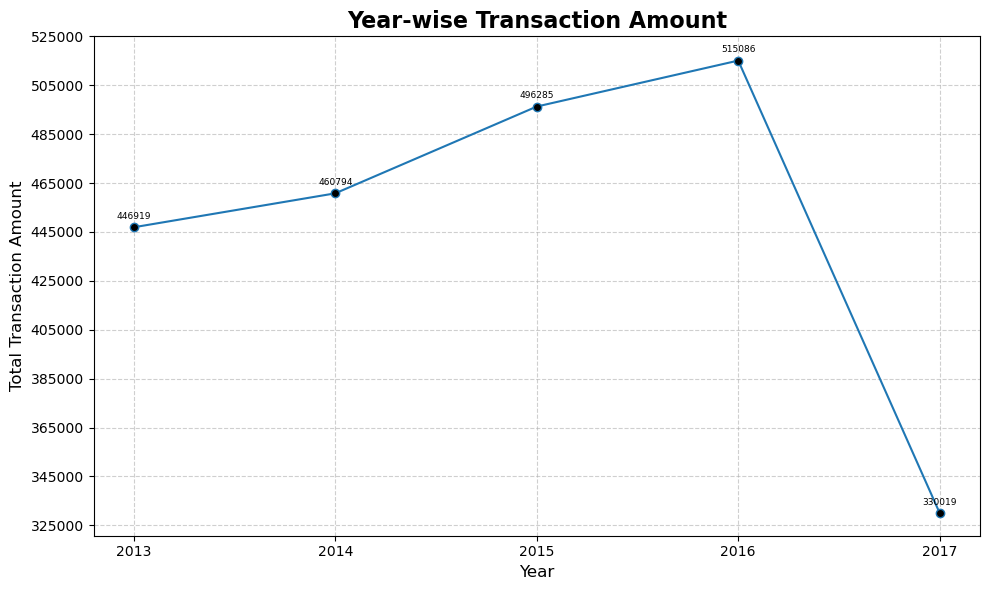

In [15]:
plt.figure(figsize=(10,6))
yearly_amount.plot(kind='line',marker='o',markerfacecolor='k')
plt.title('Year-wise Transaction Amount',fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_amount.index)
plt.yticks(range(325000,526000,20000))
for x, y in zip(yearly_amount.index, yearly_amount.values):
    plt.text(x, y + 0.005 * yearly_amount.max(), f'{y}', ha='center', va='bottom', fontsize=6.5)
plt.tight_layout()
plt.show()    

## Monthly Seasonality
-Transaction amounts are aggregated by month to observe seasonal patterns.

In [16]:
monthly_amount= (df.groupby('month')['transactions_amount'].sum().sort_index())

In [17]:
monthly_amount

month
1     196074
2     187141
3     206136
4     199904
5     208289
6     203468
7     210066
8     187546
9     160210
10    166357
11    161618
12    162294
Name: transactions_amount, dtype: int64

## Monthly Transaction Seasonality Visualization

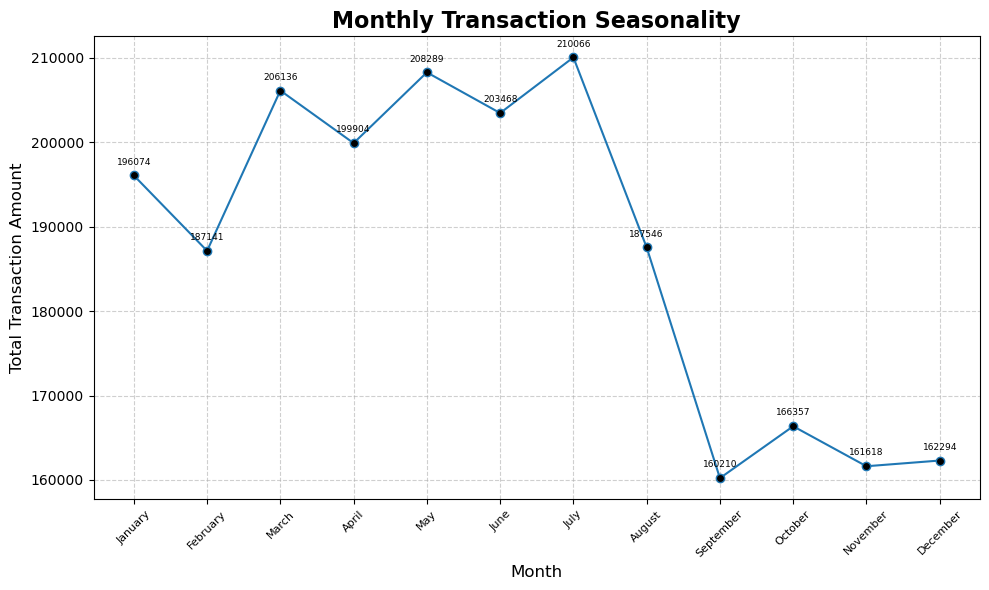

In [18]:
plt.figure(figsize=(10,6))
monthly_amount.plot(kind='line',marker='o',markerfacecolor='k')
plt.title('Monthly Transaction Seasonality',fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(ticks=range(1,13),labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
],fontsize=8,rotation=45)

for x, y in zip(monthly_amount.index, monthly_amount.values):
    plt.text(x, y + 0.005 * monthly_amount.max(), f'{y}', ha='center', va='bottom', fontsize=6.5)
plt.tight_layout()
plt.show()    

## Year and Month Combined Analysis
- This analysis examines how monthly transaction behaviour changes across different years.

In [19]:
year_month_amount=(df.groupby(['year','month'])['transactions_amount'].sum().unstack())

In [20]:
year_month_amount

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,36325.0,33880.0,37510.0,36300.0,38338.0,37238.0,37936.0,38626.0,37380.0,38626.0,37380.0,37380.0
2014,37409.0,34888.0,38601.0,36972.0,38041.0,38250.0,39717.0,39877.0,38830.0,40269.0,38970.0,38970.0
2015,38995.0,36692.0,41213.0,40080.0,41452.0,40440.0,41955.0,42901.0,42330.0,44247.0,42990.0,42990.0
2016,40330.0,41557.0,44389.0,42990.0,44423.0,42990.0,44423.0,43867.0,41670.0,43215.0,42278.0,42954.0
2017,43015.0,40124.0,44423.0,43562.0,46035.0,44550.0,46035.0,22275.0,NaN,NaN,NaN,NaN


In [21]:
df[df['year']==2017]['month'].value_counts().sort_index()

month
1    1591
2    1484
3    1643
4    1601
5    1674
6    1620
7    1674
8     810
Name: count, dtype: int64

Note: The year 2017 contains incomplete monthly data. 
Months with no recorded transactions appear as missing values.

In [22]:
year_month_amount

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,36325.0,33880.0,37510.0,36300.0,38338.0,37238.0,37936.0,38626.0,37380.0,38626.0,37380.0,37380.0
2014,37409.0,34888.0,38601.0,36972.0,38041.0,38250.0,39717.0,39877.0,38830.0,40269.0,38970.0,38970.0
2015,38995.0,36692.0,41213.0,40080.0,41452.0,40440.0,41955.0,42901.0,42330.0,44247.0,42990.0,42990.0
2016,40330.0,41557.0,44389.0,42990.0,44423.0,42990.0,44423.0,43867.0,41670.0,43215.0,42278.0,42954.0
2017,43015.0,40124.0,44423.0,43562.0,46035.0,44550.0,46035.0,22275.0,NaN,NaN,NaN,NaN


In [23]:
year_month_amount_filled=year_month_amount.fillna(0)

Missing months were filled with zero under the assumption that no transactions occurred during those periods.

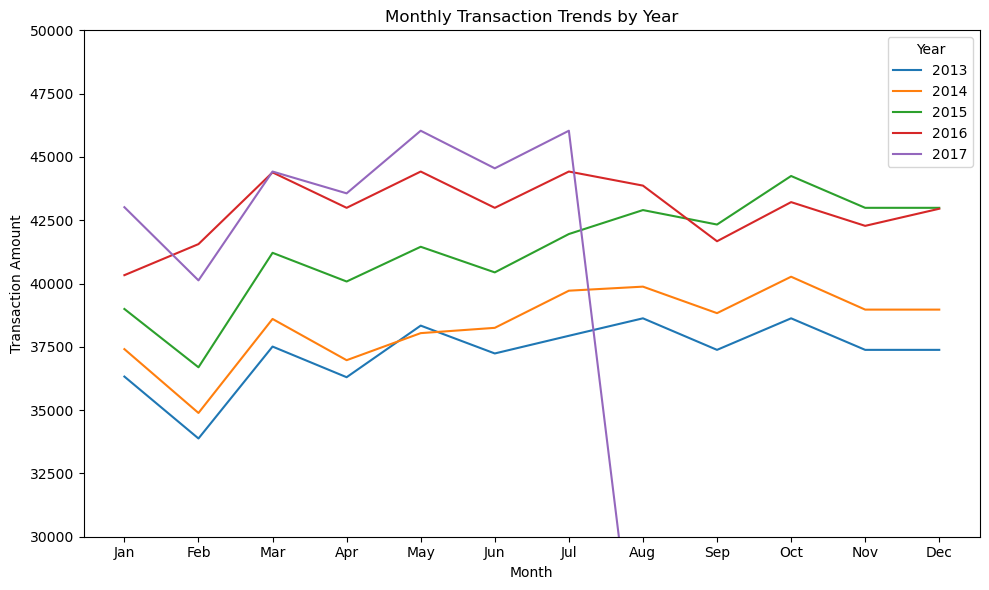

In [24]:
year_month_amount_filled.T.plot(figsize=(10, 6))

plt.title("Monthly Transaction Trends by Year")
plt.xlabel("Month")
plt.ylabel("Transaction Amount")

plt.xticks(
    ticks=range(1, 13),
    labels=['Jan','Feb','Mar','Apr','May','Jun',
            'Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.ylim(30000,50000)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


## Key Insights
- Year-wise Trend: Transactions grow steadily from 2013 to 2016, indicating long-term growth, while 2017 shows a sharp decline, likely due to incomplete or abnormal data.
- Monthly Seasonality: Transaction activity peaks between March and July, with July as the highest month, reflecting strong mid-year demand.
- Low Activity Period: Transactions decline from September to December, highlighting a consistent end-of-year slowdown.
- Partial-year data highlights the importance of cautious interpretation in time-series analysis

## Conclusion
This project demonstrates practical time-series analysis using real-world transactional data. By prioritizing correct datetime handling, ethical treatment of missing values, and clear visual communication, the project showcases how meaningful insights can be derived even from minimal datasets.

The analysis lays the groundwork for more advanced techniques such as rolling averages, anomaly detection, and forecasting.